In [1]:
# ImageDataGenerator 생성
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# ImageDataGenerator() 함수를 사용해서 원본이미지에 대해서 30도 이내에서 회전, 가로방향 30% 범위에서 이동
# 이미지 기울임은 40% 범위에서 기울임, 좌우반전 가능한 변화를 줌
gen =  ImageDataGenerator(rotation_range= 30, width_shift_range=0.3, shear_range=0.4, horizontal_flip=True)

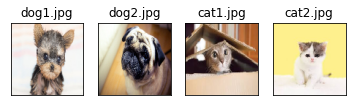

In [3]:
# 이미지 로드 및 정규화
img_array_list = []
img_names = ['Data/11/dog1.jpg', 'Data/11/dog2.jpg', 'Data/11/cat1.jpg', 'Data/11/cat2.jpg']

for i in range(len(img_names)):
    # JpegImageFile 타입 리턴
    loaded_img = load_img(img_names[i], target_size=(100, 100))
    
    # numpy type으로 바꾼후 정규화
    loaded_img_array = img_to_array(loaded_img) / 255.0
    
    img_array_list.append(loaded_img_array)
    
plt.figure(figsize=(6,6))
for i in range(len(img_array_list)):
    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([]); plt.yticks([])
    plt.title(img_names[i][8:])
    plt.imshow(img_array_list[i])

In [4]:
# flow() 함수 적용
batch_size = 2

data_gen = gen.flow(np.array(img_array_list), batch_size=batch_size)

<span style="color:red">flow() 함수에 입력으로 주어지는 원본 데이터 형상(shape) = (원본 데이터 전체 개수, 높이, 너비, 채널) 형상을 가지는 4차원 텐서롤 주어져야 함</span>

즉 (100, 100, 3) 형상을 가지는 원본데이터가 총 4개 있다면 flow()함수를 사용하기 위해서는 다음과 같이 3차원의 텐서를 원본 데이터의 총 개수가 포함된 텐서로 변환해 주어야함
(100, 100, 3) => (4, 100, 100, 3)

이처럼 전체 데이터 개수를 포함한 4차원의 텐서로 만들기 위한 일반적인 방법은 넘파이의 np.array(...), np.array([...]), np.expand_dims(..., axis = 0), np.vstack(([...],[...],[...]...))등이 있으며, 원본 데이터 형상에 따라서 적절하게 사용할 수 있음

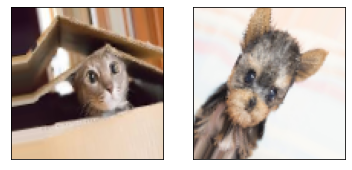

In [10]:
# next() 실행 및 변형 이미지 출력
img = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img[i])

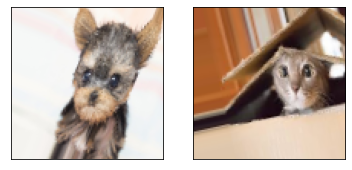

In [11]:
img = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img[i])

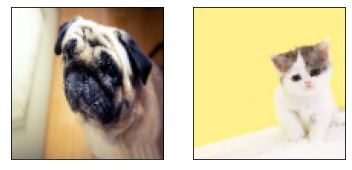

In [12]:
img = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img[i])

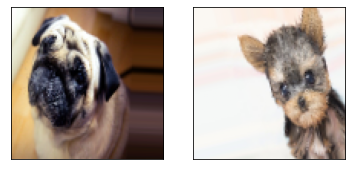

In [23]:
img = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img[i])

**flow_from_directory() 함수 예제**

In [24]:
# ImageDataGenerator 생성
gen = ImageDataGenerator(rotation_range= 30 ,width_shift_range= 0.3, shear_range= 0.3, rescale=1./255)

In [27]:
# flow_from_directory() 적용
data_path = 'Data/11/test_dir/'
batch_size = 3

data_gen = gen.flow_from_directory(directory=data_path, batch_size=batch_size,
                                   shuffle=True, target_size=(100, 100), class_mode='categorical')

Found 12 images belonging to 3 classes.


**flow_from_directory()함수는 이미지를 불러 올때, 주어진 디렉토리의 하위 디렉토리 이름에 맞춰 자동으로 labelling 해줌**  
+ test_dir
    + cat : cat1.jpg / cat2.jpg
    + deer : deer1.jpg / deer2.jpg
    + dog : dog1.jpg/ dog2.jpg


**또한 class_mode는 정답을 나타내는 방식을 나타내며 다음과 같이 지정할 수 있음**  
'binary' => 정답은 0 또는 1  
'categorical' => 정답은 one-hot encoding 형태  
'sparse' => 정답은 십진수 형태  

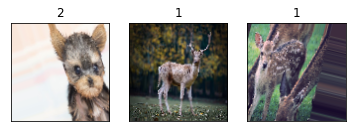

In [35]:
# next() 실행 및 변형 이미지 출력
img, label = data_gen.next() # batch_siz=3 지정된 개수만큼 이미지 저장

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])

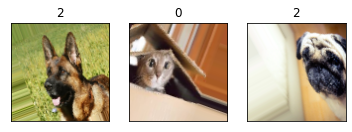

In [36]:
# next() 실행 및 변형 이미지 출력 (계속)
img, label = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    
    plt.title(str(np.argmax(label[i])))
    
    plt.imshow(img[i])

**mode='categorical' 방식으로 설정하였기 때문에 next() 실행으로 리턴되는 정답(label)은 one-hot-encoding 방식으로 나타냄.**  
따라서 정답을 십진수로 표현하기 위해 np.argmax()사용